# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t', parse_dates=['first_day_exposition'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [3]:
data['first_day_exposition'].dtypes

dtype('<M8[ns]')

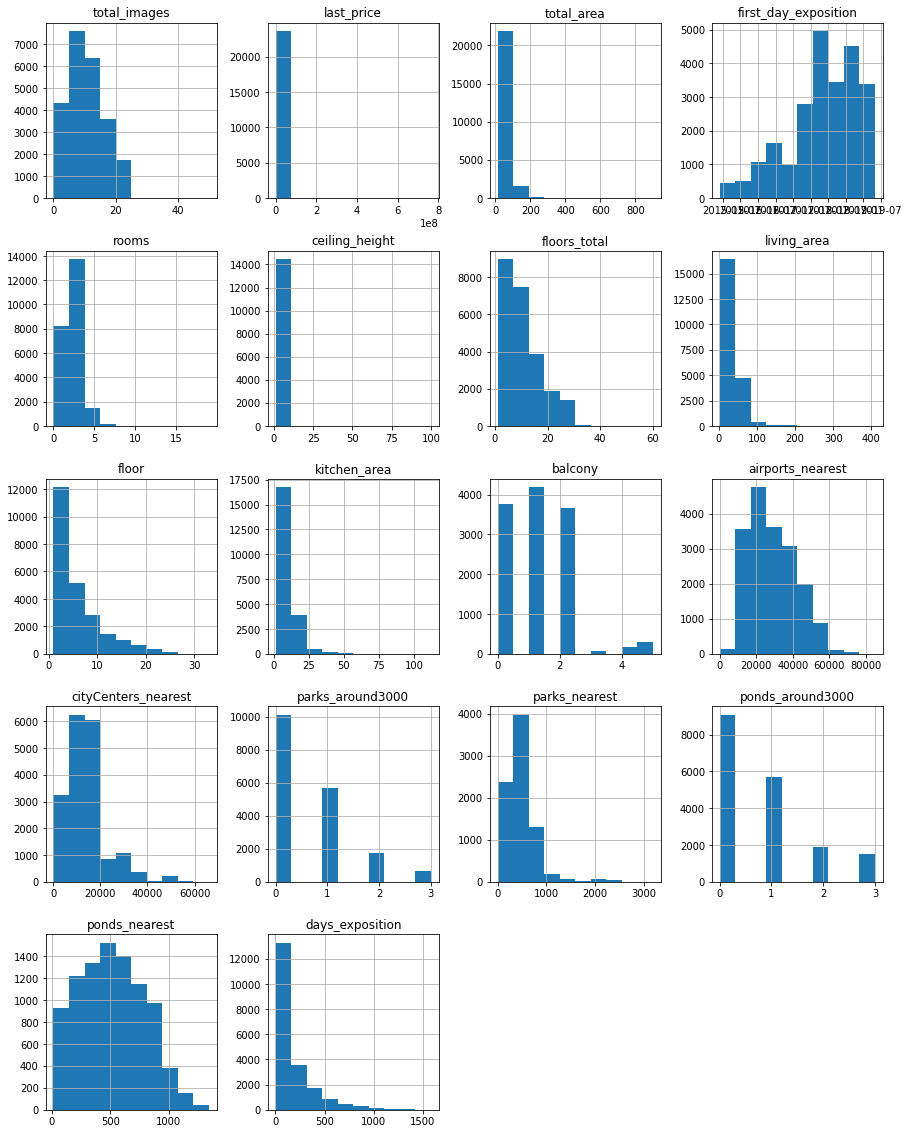

In [4]:
data.hist(figsize=(15,20));
#общая гистограмма для всех столбцов таблицы

### Предобработка данных

In [5]:
#находим пропуски
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [7]:
data['balcony']= data['balcony'].fillna(value=0)
#data['airports_nearest']= data['airports_nearest'].median()
#data['cityCenters_nearest']= data['cityCenters_nearest'].median()
data_airports_grouped = data.groupby('locality_name')['airports_nearest'].median()
data['airports_nearest'] = data['airports_nearest'].fillna(value=data_airports_grouped)

data_cityCenters_grouped = data.groupby('locality_name')['cityCenters_nearest'].median()
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=data_cityCenters_grouped)

In [8]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data['first_day_exposition'].dtypes

dtype('<M8[ns]')

In [10]:
data.info()
display(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [11]:
data['last_price'] = data['last_price'].astype(int)
#data['floors_total'] = data['floors_total'].astype("Int64")
data['parks_around3000'] = data['parks_around3000'].astype("Int64")


'last_price' целочисленная переменная, так же как и 'parks_around3000'

In [12]:
#устранение неявных дубликотов
data['locality_name'] = data['locality_name'].fillna("") 
wrong_names = ['поселок городского типа', 'посёлок городского типа', 'городской поселок', 'городской посёлок', 'поселок']
correct_name = 'посёлок'

def replace_wrong_names(name):
    for wrong_name in wrong_names:
        if wrong_name in name:
            return name.replace(wrong_name, correct_name)
    return name

data['locality_name'] = data['locality_name'].apply(replace_wrong_names)

In [13]:
#редкие и выбивающиеся значения
data['ceiling_height'].describe()
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']<8,data['ceiling_height']/10)
#если высота меньше 10 оставляем без изменений, если 10> то делим на 10


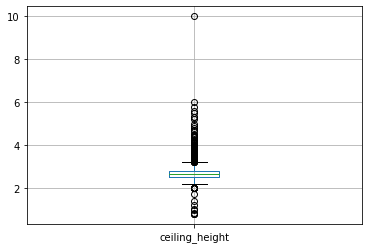

In [14]:
data.boxplot(column='ceiling_height');

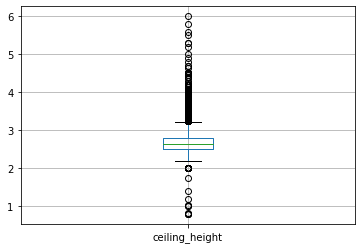

In [15]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']<8,data['ceiling_height']/10)
data.boxplot(column='ceiling_height');

для столбца 'ceiling_height' сделал условие /10 два раза тк одно значение было 100 и оно сильно выбивалось на фоне остальных.

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

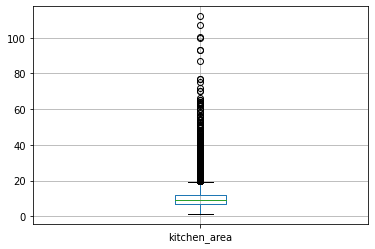

In [16]:
data.boxplot(column='kitchen_area');
data['kitchen_area'].describe()


In [17]:
data['kitchen_area'] = data['kitchen_area'].where(data['kitchen_area']<80,data['kitchen_area']/2)


count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

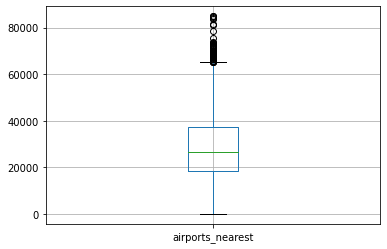

In [18]:
data.boxplot(column='airports_nearest');
data['airports_nearest'].describe()


До изменения колонка airports_nearest показывала мин значение = 0, что выглядит не корректным, поэтому к значениям которые меньше 10000 прибавляем 10000.


In [19]:
data['airports_nearest'] = data['airports_nearest'].where(data['airports_nearest']>100000,data['airports_nearest']+10000)


In [20]:
display(data.duplicated().sum())


0

### Посчитайте и добавьте в таблицу новые столбцы

In [21]:
#ценв одного квадратного метра
data['squer_meter_price'] = data['last_price']/data['total_area']
data['first_day_exposition'].dtypes
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
#data['floor_type'] = 'другой'
#data['floor_type'] =  data['floor_type'].where(data['floor']>1, 'первый')
#data['floor_type'] =  data['floor'].where(data['floor']<data['floors_total'], 'последний')

#data['floor_type'] =  data['floor_type'].where(data['floor']>1 & data['floor']<data['floors_total'], 'другой')
data['cityCenter_distance'] = data['cityCenters_nearest']/1000
data['cityCenter_distance'].round()


0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenter_distance, Length: 23699, dtype: float64

In [22]:
def type_floor(row):
    if 1 == row['floor']:
        return 'первый'
    elif row['floors_total'] == row['floor']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(type_floor, axis=1)
print(data['floor_type'].value_counts())

другой       17446
последний     3336
первый        2917
Name: floor_type, dtype: int64


4 Проведите исследовательский анализ данных

4.1 Изучите следующие параметры объектов:

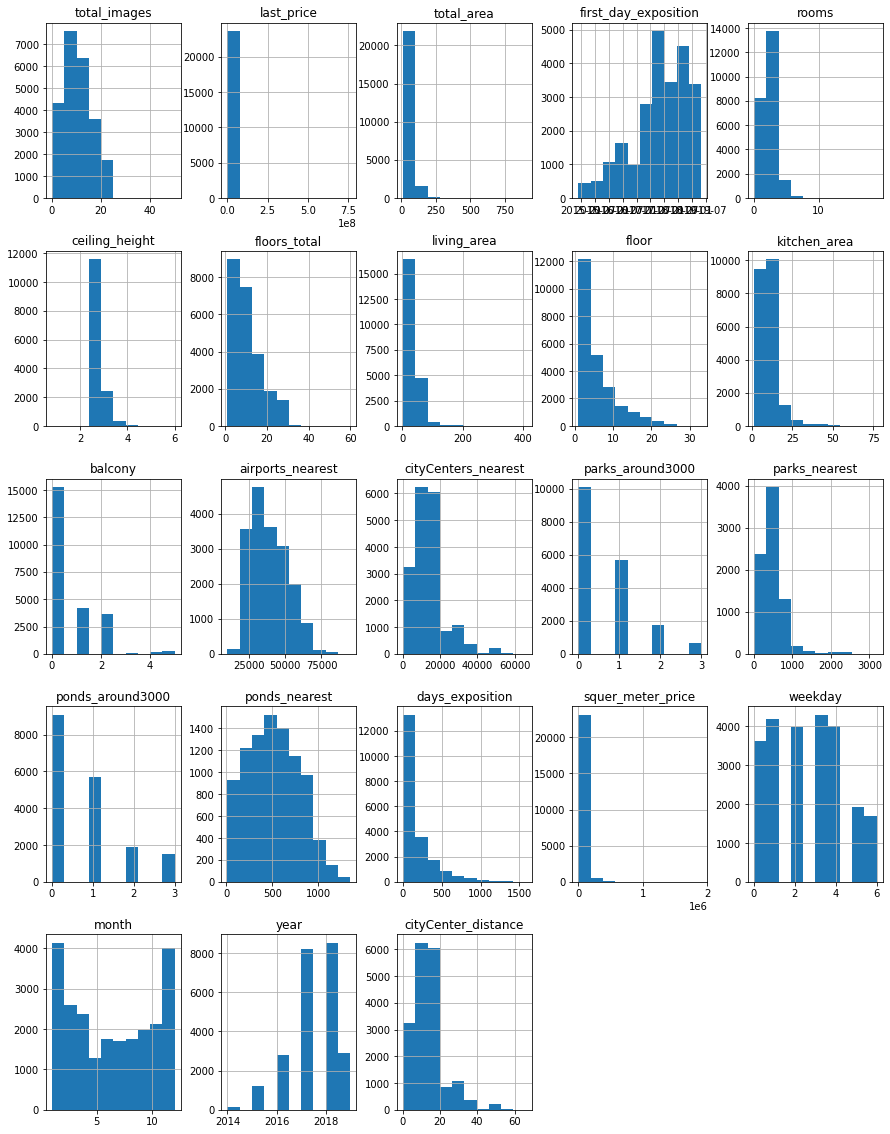

In [23]:
data.hist(figsize=(15,20));

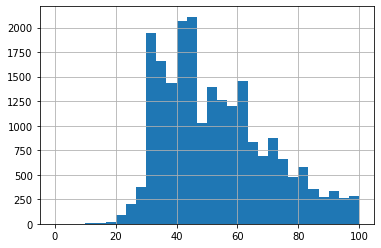

In [24]:
#общая площадь;
data['total_area'].hist(bins=30, range=(0,100));

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Я бы советовал сократить range и тогда мы сможем увидеть пиковые значения. 
</div>

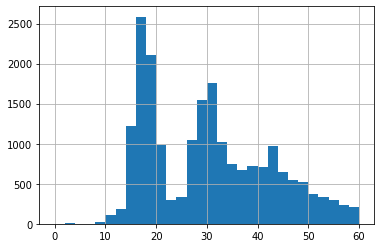

In [25]:
#жилая площадь;
data['living_area'].hist(bins=30, range=(0,60));

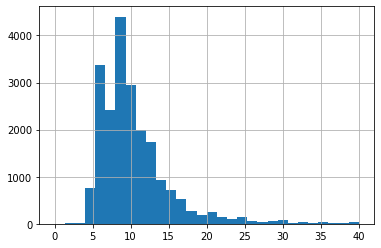

In [26]:
#площадь кухни;
data['kitchen_area'].hist(bins=30, range=(0,40));

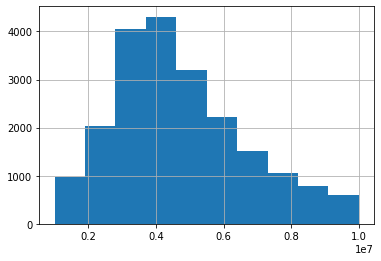

In [27]:
#цена объекта
data['last_price'].hist(bins=10,range=(1000000,10000000));

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

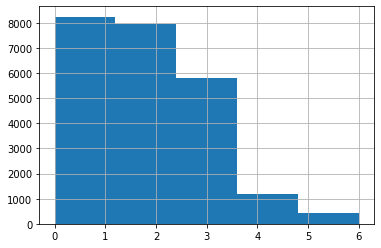

In [28]:
#количество комнат;
data['rooms'].hist(bins=5, range=(0,6));
data['rooms'].value_counts()

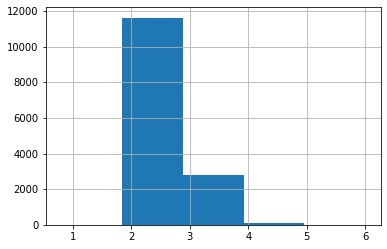

In [29]:
#высота потолков;
data['ceiling_height'].hist(bins=5);

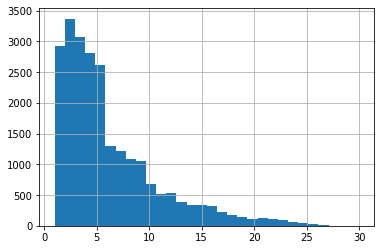

In [30]:
#этаж квартиры;
data['floor'].hist(bins=30, range=(1,30));

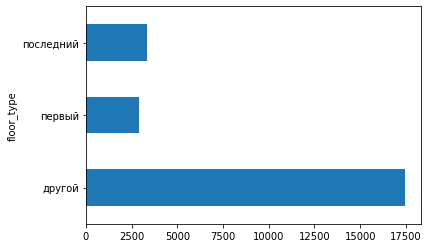

In [31]:
#тип этажа квартиры («первый», «последний», «другой»);
data.groupby('floor_type')['floor_type'].count().plot.barh();

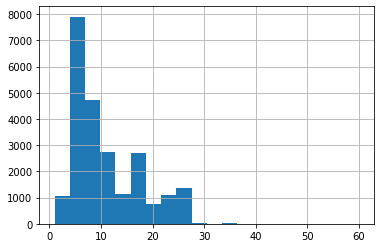

In [32]:
#общее количество этажей в доме;
data['floors_total'].hist(bins=20);

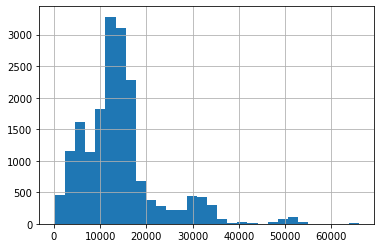

In [33]:
#расстояние до центра города в метрах;
data['cityCenters_nearest'].hist(bins=30);

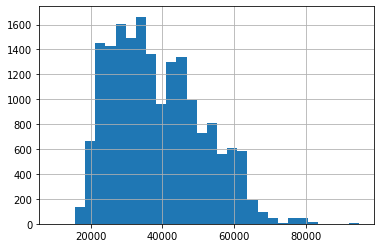

In [34]:
#расстояние до ближайшего аэропорта;
data['airports_nearest'].hist(bins=30);

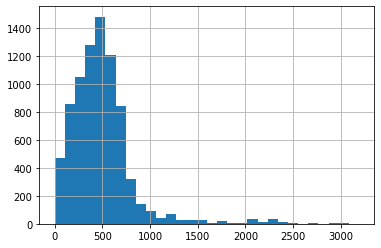

In [35]:
#расстояние до ближайшего парка;
data['parks_nearest'].hist(bins=30);

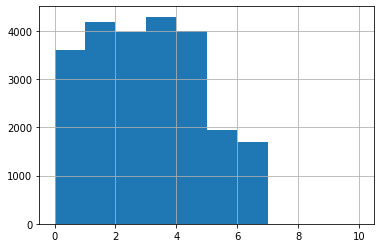

In [36]:
#день публикации объявления.
data['weekday'].hist(bins=10, range=(0,10));

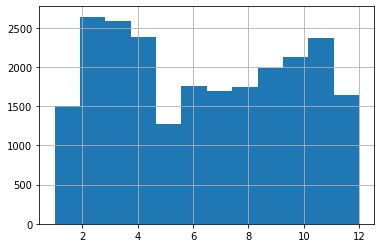

In [37]:
#месяц публикации объявления.
data['month'].hist(bins=12, range=(1,12));

Гистограмма стоимости объекта похожа на нормалное распределение с пиком в 4 миллиона. Максимальное кол-во квартир имеет до 2-3 комнат, с высотой потолков в 2 метра. Судя по гистограмме наибольшее кол-во кваритир расположены на первом и втором этажах.Гистограммы расстояния до центра города, ближайшего аэропорта и ближайшего парка похожи на нормальное распределение.

In [38]:
#Посчитайте среднее и медиану
display(data['days_exposition'].mean())
display(data['days_exposition'].median())

180.88863436982163

95.0

<AxesSubplot:>

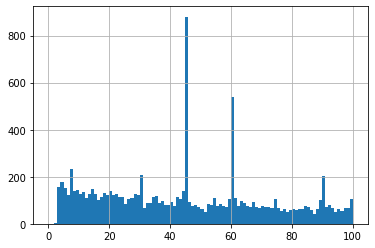

In [52]:
#Постройте гистограмму.
data['days_exposition'].hist(bins = 100, range=(0,100))

In [40]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

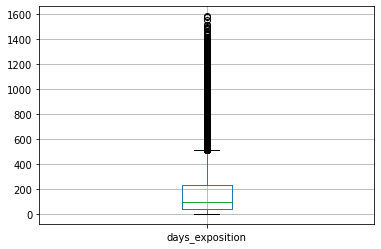

In [41]:
data.boxplot(column='days_exposition')

Продажа квартир в среднем длится 180 дней. Но есть и аутлаеры где самая быстрая продажа- 1 день, а самая долгая - 1580 дней.

4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?

общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).

data_combined = data
name_stat = data.pivot_table(index='name', values='time_spent')


In [42]:
#data_combined['last_price'] = data['last_price']
#data_combined['total_area'] = data['total_area']


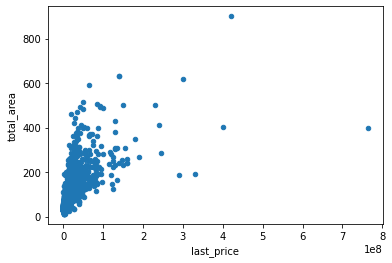

In [43]:
data.plot(x='last_price', y='total_area', kind='scatter');


0.6536750579657242

0.5664915336952651

0.5033397371156947

0.3633428499648948

0.08114593098611303

<AxesSubplot:xlabel='floor_type'>

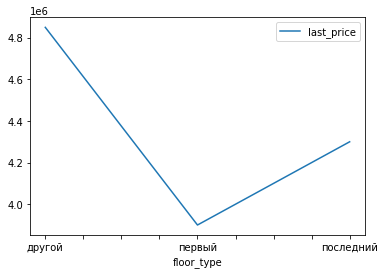

In [44]:
#multi = data.pivot_table(index='floors_total', values=['total_area','living_area','kitchen_area','rooms','floor_type','days_exposition', 'last_price'], aggfunc='mean')
#display(multi.corr())
display(data['last_price'].corr(data['total_area']))
display(data['last_price'].corr(data['living_area']))
display(data['last_price'].corr(data['kitchen_area']))
display(data['last_price'].corr(data['rooms']))
display(data['last_price'].corr(data['days_exposition']))
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot()



,days_exposition,kitchen_area,last_price,living_area,rooms,total_area
days_exposition,1.000000,-0.640286,-0.085749,-0.252003,-0.404560,-0.488957
kitchen_area,-0.640286,1.000000,0.290669,0.085645,0.093798,0.395981
last_price,-0.085749,0.290669,1.000000,0.655849,0.442449,0.738972
living_area,-0.252003,0.085645,0.655849,1.000000,0.897739,0.923741
rooms,-0.404560,0.093798,0.442449,0.897739,1.000000,0.811538
total_area,-0.488957,0.395981,0.738972,0.923741,0.811538,1.000000


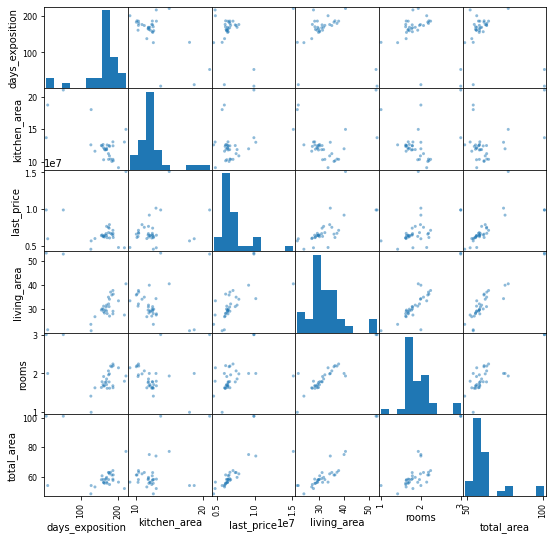

In [45]:
multi = data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms','floor_type','days_exposition'], aggfunc='mean')
display(multi.corr())
pd.plotting.scatter_matrix(multi, figsize=(9,9));

Исходя из результатов корреляции данных самая высокая положительная корреляция по отношению к цене объекта наблюдается в общей площади обхекта (total_area) 0.738972

4.4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [46]:
data['m2_price'] = data['last_price']/data['total_area']
#df = data.pivot_table(index='locality_name', values='m2_price', aggfunc=['count', 'mean'])
#df.sort_values(by=df.columns[1], ascending=False).head(10)

In [47]:
#Выделим строку с 10 городами с наибольшим числом объявлений 
top_city = data['locality_name'].value_counts().sort_values(ascending=False).head(10).index

In [48]:
#Делаем выборкуиз нашего датасета по эти 10 городам и средней стоимости квадратного метра квртрры в них
data_flat_top_city = data.query('locality_name in @top_city').pivot_table(index='locality_name', values='m2_price', aggfunc='median').reset_index()

In [49]:
#Отсортируем города по средней цене квадратного метра
data_flat_top_city = data_flat_top_city.sort_values(by = 'm2_price', ascending = False).reset_index()

In [50]:
display(data_flat_top_city.head(10))

,index,locality_name,m2_price
0,5,Санкт-Петербург,104761.904762
1,4,Пушкин,100000.000000
2,6,деревня Кудрово,91860.465116
3,8,посёлок Парголово,91642.857143
4,7,посёлок Мурино,85878.462169
5,9,посёлок Шушары,76876.172608
6,3,Колпино,74723.748474
7,2,Гатчина,67796.610169
8,0,Всеволожск,65789.473684
9,1,Выборг,58158.319871


Исходя из результатов таблицы видно, что самая дорогая стоимость квадратного метра находится в Санкт-Петербурге, а самая низкая в Выборге.

4.5 Опишите, как стоимость объектов зависит от расстояния до центра города.

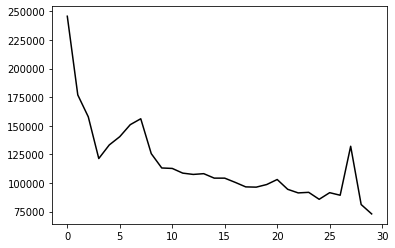

In [51]:
df = data[data['locality_name']=="Санкт-Петербург"].copy()
df['m2_price'] = data['last_price']/data['total_area']
df['km']= (df['cityCenters_nearest']/1000).round()
df_km = df.groupby('km')['m2_price'].mean()
plt.plot(df_km, '-0');

График показывает тенденцию уменьшения цены.

### Общий вывод

<b>Был предоставлен датасет с информацией о продаже квартир. Были определены в каких столбцах находятся пропуски, после пропуски в данных были заполнены в тех столбцах, где это необходимо: кол-во балконов на объекте, удаленность от центра города и аэропортов, а так же были испралены редкие и выбиваюзиеся значения в восоте потолков. Был заменен тип object для цены объекта и кол-во парков в радиусе 3000м как для целочисленных значений. </b>

<b>Явных дубликотов в датасете не оказалось, но были найдены и исправлены неявные дубликаты. А так же были найдены и устранены редкие и выбивающиеся значения для высоты потолков, площади кухни и расстояния до ближайшего аэропорта. </b>

<b>В датасет были добавлены новые столбцы с ценой квадратного метра, категоризацией этажа квартиры, днем недели, месяцем, годом публикаци объявления, тип этажа и растояние до центра. </b>

<b>Исследование диаграмм рассеивание показало прямую зависимость между ценой продажи и размером квартиры. В меньшей степени на цену влияют площадью кухни, living_area и кол-во комнат. Явной зависимотси между ценой продажи и днем недели выставления объявления нет. А также большая часть квартир из выборки продавалось в первые 50 дней, несмотря на то что медиана и средняя равны 95 и 180 дней соответсвенно.</b>
 
<b>Среди городов с наибольшим числом объявлений , самые дорогие цены за квадратный метр квартиры в Санкт-Петербурге, Пушкин и деревня Кудрово. Самые низкине - Гатчина, Всеволжск и Выборг.</b>

<b>В Санкт-Петербурге цена за квадратный метр резко снижается при удалении от центра больше 10 км.</b>